In [6]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
# setup

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot

In [27]:
# Model / data parameters
num_classes = 10
conv_input_shape = (28, 28, 1)
ff_input_shape = (784,)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = (x_train.astype("float32") / 255) - 0
x_test = (x_test.astype("float32") / 255) - 0

In [28]:
# Flatten the images.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))
print("x_train shape:", x_train.shape)
print(x_train[:9])

x_train shape: (60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [29]:

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [46]:
ff_model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", input_shape=ff_input_shape),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear")
    ]
)

ff_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_19 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 65        
Total params: 54,465
Trainable params: 54,465
Non-trainable params: 0
_________________________________________________________________


In [8]:
conv_model = keras.Sequential(
    [
        keras.Input(shape=conv_input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

conv_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [47]:
batch_size = 125
epochs = 15

ff_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

ff_history = ff_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


ValueError: in user code:

    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:755 train_step
        loss = self.compiled_loss(
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.8/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (125, 10) and (125, 1) are incompatible


In [51]:
batch_size = 125
epochs = 15

conv_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

conv_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
432/432 [==============================] - 12s 28ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0181 - val_accuracy: 0.9957
Epoch 2/15
432/432 [==============================] - 11s 26ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0198 - val_accuracy: 0.9957
Epoch 3/15
432/432 [==============================] - 12s 28ms/step - loss: 0.0152 - accuracy: 0.9944 - val_loss: 0.0189 - val_accuracy: 0.9960
Epoch 4/15
432/432 [==============================] - 12s 27ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0211 - val_accuracy: 0.9952
Epoch 5/15
432/432 [==============================] - 11s 26ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0228 - val_accuracy: 0.9955
Epoch 6/15
432/432 [==============================] - 12s 27ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0217 - val_accuracy: 0.9955
Epoch 7/15
432/432 [==============================] - 12s 28ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0228 - val_accuracy:

Erro: 0.023008868098258972 
Acurácia: 0.9932000041007996
Generate predictions for samples


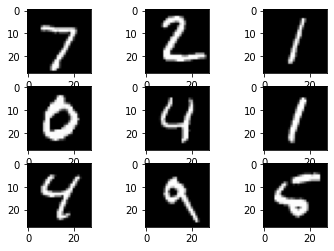

[[7.42410213e-12 7.46521985e-13 2.38094664e-08 2.38032793e-09
  1.34674673e-14 6.91775088e-13 7.10840406e-21 1.00000000e+00
  1.38790732e-11 6.68317091e-09]
 [8.20086488e-09 7.63407254e-11 1.00000000e+00 4.06129644e-12
  3.42787898e-14 3.12769536e-16 8.05157385e-10 1.92998482e-16
  1.45360265e-10 9.18709405e-16]
 [1.81248471e-11 9.99998689e-01 1.33832123e-09 4.51123514e-12
  1.28092665e-06 2.20785508e-11 4.60435051e-10 3.33045911e-08
  1.29344446e-09 7.68329081e-11]
 [9.99987364e-01 5.38055866e-21 1.24709118e-07 6.38604655e-11
  4.21583393e-11 2.09217244e-09 1.23194995e-05 4.42133824e-13
  2.02759054e-07 1.32136595e-08]
 [7.61792365e-12 7.93907210e-15 2.18743101e-12 1.39004248e-15
  1.00000000e+00 2.15932347e-14 5.70976634e-11 1.71428938e-13
  1.23254107e-11 4.18936921e-08]
 [3.31182015e-09 9.99992728e-01 6.28221670e-08 3.00824539e-11
  1.81853147e-06 1.34816542e-11 1.62108349e-09 5.35703521e-06
  2.42479761e-08 1.28446400e-08]
 [6.97857406e-22 2.67123296e-15 3.83403189e-13 1.77338250e

In [50]:
score = conv_model.evaluate(x_test, y_test, verbose=0)
print('Erro: {} \nAcurácia: {}'.format(score[0], score[1]))

print("Generate predictions for samples")
predictions = conv_model.predict(x_test[:9])

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

print(predictions)

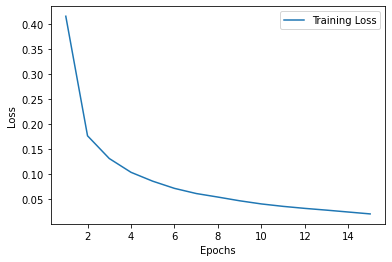

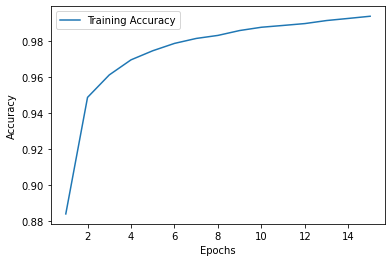

[7 2 1 0 4 1 4 9 5]


In [43]:
loss_values = ff_history.history['loss']
accuracy_values = ff_history.history['accuracy']
epochs = range(1, len(loss_values)+1)

pyplot.plot(epochs, loss_values, label='Training Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()

pyplot.show()

pyplot.plot(epochs, accuracy_values, label='Training Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()

pyplot.show()

predictions = ff_model.predict_classes(x_test[:9])
print(predictions)